# 生物情報の解析

In [ ]:
# GoogleドライブにあるファイルをColabで読み書きできるようにする
# google.colab: Google Colabのためのライブラリ
# drive: Googleドライブに接続するためのモジュール
# '/content/drive': Google ドライブを接続（マウント）したときに使われる仮想的なフォルダ
# drive.mountでは、'/content/drive'以外のフォルダを指定することは推奨されていない
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os: OS（オペレーティングシステム）に関する操作を行うためのモジュール
# os.name（OSの種類を示す変数） を入力すると、Google Colabの場合、'posix'が表示される
# chdir: 作業ディレクトリの変更（設定）
import os
os.chdir('/content/drive/MyDrive/bio/')

In [ ]:
# matplotlib: データの可視化をインタラクティブに行うライブラリ
# pyplot: グラフ描画を行うモジュール
# matplotlibライブラリのpyplotモジュールをpltという名前で取り込む
import matplotlib.pyplot as plt
# japanize-matplotlib: 日本語の文字表示に対応したライブラリ（matplotlibは日本語の文字表示に対応していないためインストールが必要）
!pip install japanize-matplotlib
# japanize-matplotlibライブラリのjapanize_matplotlibモジュールを取り込む
# これにより、matplotlibのフォント設定が自動的に変更され、日本語が表示できるようになる
import japanize_matplotlib
# 上記でうまくいかない場合は、以下の関数を実行する
# japanize_matplotlib.japanize()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=410b05c5e7405daf961be3c4606adc13e48ce6ce698b27b8a7283fa426be72a2
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


**BioPythonのインストール**

In [ ]:
!pip install Biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.7 MB/s eta 0:00:00


# GC含量の計算

**GC含量の計算とプロット**

In [ ]:
# !pip install biopython
from Bio.SeqUtils import gc_fraction

def read_fasta(name):
    f = open(name, 'r')
    seq=''
    for line in f.readlines():
        if line[0] != '>':
            seq += line.strip()
    f.close()
    return seq

seq_K12 = read_fasta('K12_genomic.fna')
seq_O157 = read_fasta('O157_genomic.fna')

print("K12 genome")
print(f"length : {len(seq_K12)}")
print(f"GC content : {gc_fraction(seq_K12):.3f}")

print("O157 genome")
print(f"length : {len(seq_O157)}")
print(f"GC content : {gc_fraction(seq_O157):.3f}")

K12 genome
length : 4641652
GC content : 0.508
O157 genome
length : 5498578
GC content : 0.505


In [ ]:
from Bio.SeqUtils import gc_fraction

def read_fasta(name):
    f = open(name, 'r')
    seq=''
    for line in f.readlines():
        if line[0] != '>':
            seq += line.strip()
    f.close()
    return seq

### FASTA形式のファイルを指定して下さい

seq_mg = read_fasta('mycoplasma_genitalium.fna')
seq_mp = read_fasta('mycoplasma_pneumoniae.fna')

print("Mycoplasma genitalium genome")
print(f"length : {len(seq_mg):.5g}")
print(f"GC content : {gc_fraction(seq_mg):.3f}")

print("Mycoplasma pneumonie genome")
print(f"length : {len(seq_mp):.5g}")
print(f"GC content : {gc_fraction(seq_mp):.3f}")

Mycoplasma genitalium genome
length : 5.8008e+05
GC content : 0.317
Mycoplasma pneumonie genome
length : 8.2302e+05
GC content : 0.399


**大腸菌ゲノムの部位ごとのGC含量**

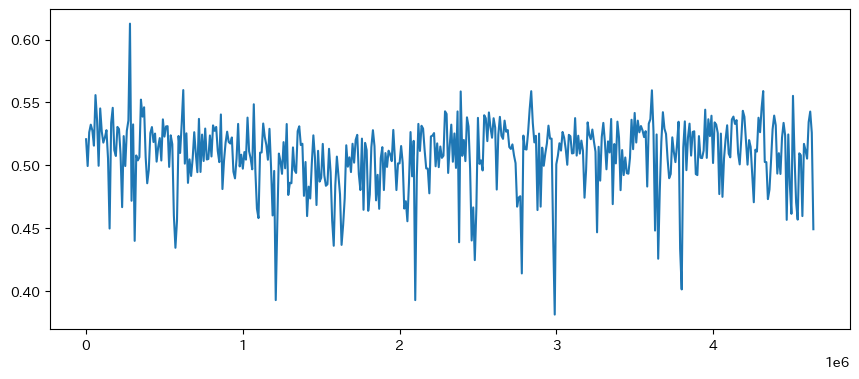

In [ ]:
from Bio import SeqIO
from Bio import SeqUtils
size = 10000        # ウィンドウサイズ
for fna in SeqIO.parse("K12_genomic.fna","fasta"):
    results = []
    seq = fna.seq
    for i in range(0,len(seq),size):
        GC_ratio = SeqUtils.gc_fraction(seq[i:i+size])
        results.append(GC_ratio)
with open("K12.txt","w") as o:
    o.write(fna.id + "," + str(size) + "\n")
    for i in range(len(results)):
        o.write(str(i*size+1) + "," + str(results[i]) + "\n")

import matplotlib.pyplot as plt
positions = []
values = []
with open("K12.txt","r") as f:
     f.readline()    #一行目はseqidとwindow sizeを示すメタ情報なのでスキップ
     for line in f:
         row = line.rstrip().split(",")
         positions.append(int(row[0]))  # ポジションは整数に変換
         values.append(float(row[1]))   # GC含量はfloatに変換

fig = plt.figure(figsize=(10,4))
ax  = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(positions,values)

**GC skewの計算と表示**

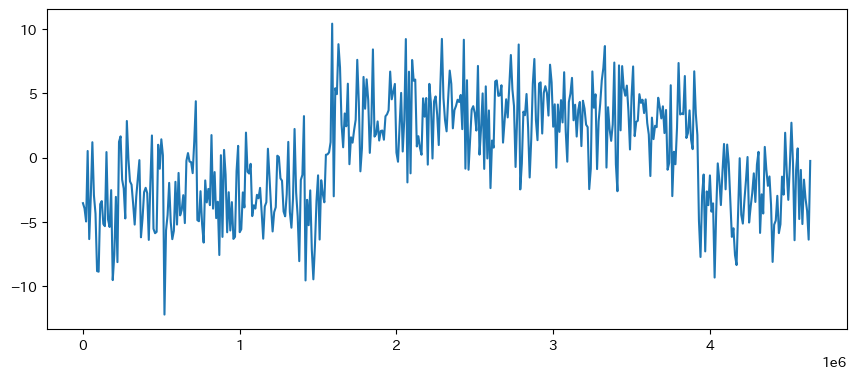

In [ ]:
from Bio import SeqIO
from Bio import SeqUtils
size = 10000
for fna in SeqIO.parse("K12_genomic.fna","fasta"):
    results = []
    seq = fna.seq
    for i in range(0,len(seq),size):
        nG = seq[i:i+size].count('G')
        nC = seq[i:i+size].count('C')
        if (nC + nG == 0):
            print("#G + #C = zero")
        GC_skew = 100 * (nC - nG)/(nC + nG)
        results.append(GC_skew)
    with open("K12.txt","w") as o:
        o.write(fna.id + "," + str(size) + "\n")
        for i in range(len(results)):
            o.write(str(i*size+1) + "," + str(results[i]) + "\n")
import matplotlib.pyplot as plt
positions = []
values = []
cum = 0.0
with open("K12.txt","r") as f:
     f.readline()    #一行目はseqidとwindow sizeを示すメタ情報なのでスキップ
     for line in f:
         row = line.rstrip().split(",")
         positions.append(int(row[0]))  # ポジションは整数に変換
#         cum = cum + float(row[1])
#         values.append(cum)
         values.append(float(row[1]))
fig = plt.figure(figsize=(10,4))
ax  = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(positions,values)


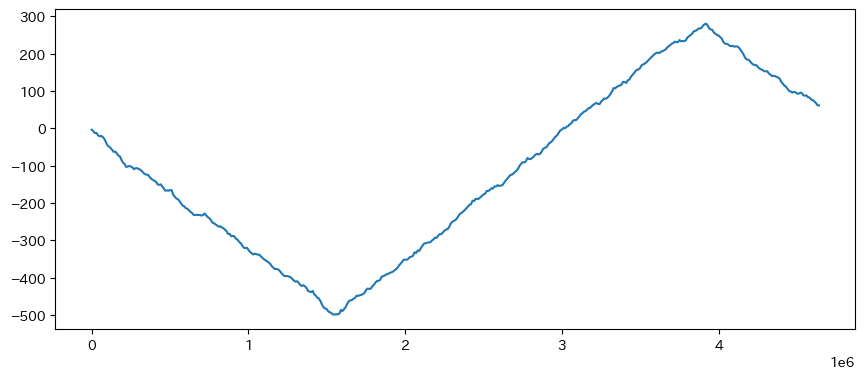

In [ ]:
from Bio import SeqIO
from Bio import SeqUtils
size = 10000
for fna in SeqIO.parse("K12_genomic.fna","fasta"):
    results = []
    seq = fna.seq
    for i in range(0,len(seq),size):
        nG = seq[i:i+size].count('G')
        nC = seq[i:i+size].count('C')
        if (nC + nG == 0):
            print("#G + #C = zero")
        GC_skew = 100 * (nC - nG)/(nC + nG)
        results.append(GC_skew)
    with open("K12.txt","w") as o:
        o.write(fna.id + "," + str(size) + "\n")
        for i in range(len(results)):
            o.write(str(i*size+1) + "," + str(results[i]) + "\n")
import matplotlib.pyplot as plt
positions = []
values = []
cum = 0.0
with open("K12.txt","r") as f:
     f.readline()    #一行目はseqidとwindow sizeを示すメタ情報なのでスキップ
     for line in f:
         row = line.rstrip().split(",")
         positions.append(int(row[0]))  # ポジションは整数に変換
         cum = cum + float(row[1])
         values.append(cum)
#         values.append(float(row[1]))
fig = plt.figure(figsize=(10,4))
ax  = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(positions,values)


O157のゲノム<br>
E. coli O157 のゲノム上の一部分（2,900,000～2,960,000 bp）で、200 bpごとのGC含量を計算<br>
GCが周囲と大きく異なる短い区間が存在

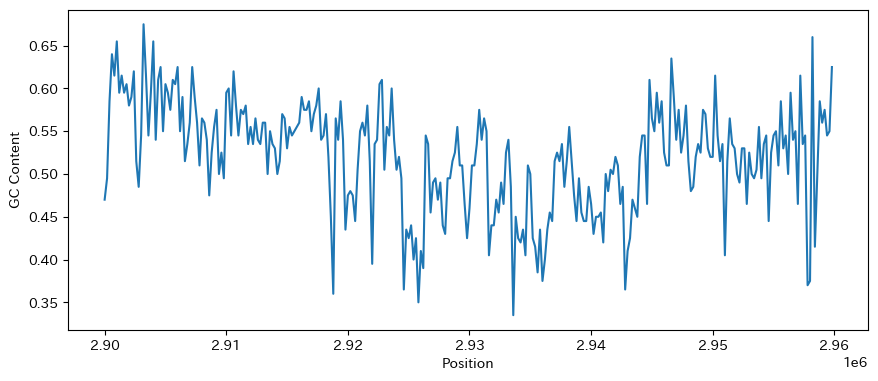

In [ ]:
from Bio import SeqIO
from Bio import SeqUtils
import matplotlib.pyplot as plt

def calculate_gc_content(input_file, output_file, start=0, end=None, window_size=10000):
    results = []
    positions = []

    for fna in SeqIO.parse(input_file, "fasta"):
        seq = fna.seq
        if end is None:
            end = len(seq)
        for i in range(start, min(end, len(seq)), window_size):
            GC_ratio = SeqUtils.gc_fraction(seq[i:i+window_size])
            results.append(GC_ratio)
            positions.append(i + 1)  # ポジションを保存

    # 結果をファイルに出力
    with open(output_file, "w") as o:
        o.write(fna.id + "," + str(window_size) + "\n")
        for pos, gc in zip(positions, results):
            o.write(str(pos) + "," + str(gc) + "\n")

    # グラフの表示
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.plot(positions, results)
    ax.set_xlabel("Position")
    ax.set_ylabel("GC Content")
    plt.show()

# 2924907ー2925851（99%）
calculate_gc_content("O157_genomic.fna", "O157.txt", start=2900000, end=2960000, window_size=200)


# 配列のアラインメント

In [ ]:
from Bio import Align

aligner = Align.PairwiseAligner()

In [ ]:
X = "ACGTACGT"
Y = "ACCTATGT"
alignments = pairwise2.align.globalms(X,Y,1,-1,-1,-1) # 2つの配列X, Y、一致スコア、不一致スコア、オープンペナルティ、延長ペナルティ
print(format_alignment(*alignments[0]))   # alignments[0]はスコアが最も高いアライメント、format_alignmentはアラインメントを整形

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# 一致度を計算する関数
def calculate_identity(seq1, seq2):
    # グローバルアライメント（マッチスコア1、不一致スコア-1、ギャップペナルティは-1）
    alignments = pairwise2.align.globalms(seq1, seq2, 1, -1, -1, -1)

    # 最良のアライメント結果をフォーマットして表示
    print(format_alignment(*alignments[0]))

    # スコア最大のalignments[0]の2つの配列（alignments[0][0], alignments[0][1]）を取り出す
    aligned_seq1, aligned_seq2 = alignments[0][0], alignments[0][1]

    # 一致している文字をカウント
    matches = sum(base1 == base2 for base1, base2 in zip(aligned_seq1, aligned_seq2))

    # 一致度を計算（アラインメントの長さに対する一致数の割合）
    alignment_length = len(aligned_seq1)
    identity_percentage = (matches / alignment_length) * 100

    return identity_percentage

# 関数の呼び出し
X = "ACGTACGT"
Y = "ACCTATGT"

identity = calculate_identity(X, Y)
print(f"一致度: {identity:.2f}%")


In [ ]:
X = "ACCGT"
Y = "ACCTATGT"
alignments = pairwise2.align.globalms(X,Y,1,-1,-1,-1) # 2つの配列X, Y、一致スコア、不一致スコア、オープンペナルティ、延長ペナルティ
print(format_alignment(*alignments[0]))

# ドットマトリックス

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ドットマトリックスを生成する関数
import numpy as np
import matplotlib.pyplot as plt

# ドットマトリックスを生成する関数
def dot_matrix(seq1, seq2, window=1, stringency=1, xlabel="配列1", ylabel="配列2"):
    # 2つの配列の長さを取得
    len_seq1 = len(seq1)
    len_seq2 = len(seq2)

    # ドットマトリックス用の2次元配列を作成（初期値は0）
    dot_matrix = np.zeros((len_seq2, len_seq1))  # 配列の順番を修正

    # ウィンドウ内で一致する塩基数を確認
    for i in range(len_seq2 - window + 1):
        for j in range(len_seq1 - window + 1):
            # ウィンドウ内で連続する一致をカウント
            matches = sum(seq2[i + k] == seq1[j + k] for k in range(window))
            if matches >= stringency:
                # 一致がstringencyを超えたら中心にドットを残す
                dot_matrix[i + window // 2, j + window // 2] = 1

    # ドットマトリックスをプロット
    plt.imshow(dot_matrix, cmap="Greys", interpolation="none")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"ドットマトリックス (window={window}, stringency={stringency})")
    plt.show()

# 例として2つの配列を定義
X = "ACGTACGT"
Y = "ACCTATGT"

# ドットマトリックスを表示 (windowとstringencyを指定して)

### window=3, stringency=2として実行してみよう

dot_matrix(X, Y, window=1, stringency=1, xlabel="配列1 (X)", ylabel="配列2 (Y)")

In [ ]:
# ヒトとチンパンジーのヘモグロビンβ鎖遺伝子配列
hbb_human = "ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTGTTGCCACACTGGTGACAACCTCAAGGGCACCTTTGCCAAGGAGGTGCTGAGGACTCTGAGGAGA"
hbb_chimp = "ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTGTTGCCACACTGGTGACAACCTCAAGGGCACCTTTGCCAAGGAGGTGCTGAGGACTCTGAGGAGA"

# ドットマトリックスを表示

### 変化させて実行してみよう

dot_matrix(hbb_human, hbb_chimp, 1, 1, "ヒト", "チンパンジー")

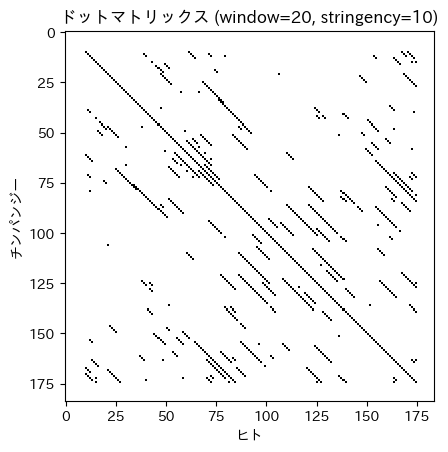

In [ ]:
# ドットマトリックスを表示
# これは実行しないで下さい。時間がかかりすぎ。
dot_matrix(hbb_human, hbb_chimp, 20, 10, "ヒト", "チンパンジー")

# データベースのアクセスと配列アラインメント

**FASTA形式のファイルに格納された配列を読み出す関数**

In [ ]:
import numpy as np
def read_fasta(name):
    f = open(name, 'r')
    seq=''
    for line in f.readlines():
        if line[0] != '>':
            seq += line.strip()
    f.close()
    return seq


In [ ]:
# UniProtKBからエントリ名を使ってFASTA形式のデータを取得する関数
# 以下で、この関数を使います
def fetch_uniprot_sequence(entry_name):
    base_url = "https://www.uniprot.org/uniprot/"
    url = f"{base_url}{entry_name}.fasta"
    response = requests.get(url)

    if response.status_code == 200:
        # 配列データを文字列に変換し、SeqIOでパース
        fasta_io = StringIO(response.text)
        record = SeqIO.read(fasta_io, "fasta")
        return record.seq
    else:
        raise ValueError(f"Failed to retrieve data for UniProt entry name: {entry_name}")

In [ ]:
# ヒトのヘモグロビンβ鎖とラマのヘモグロビンβ鎖
import requests
from Bio import SeqIO
from io import StringIO

# HBB_HUMAN（ヒトのヘモグロビンβ鎖）とHBB_LAMGU（ラマのヘモグロビンβ鎖）をUniProtから取得
# HBB_HUMAN: https://www.uniprot.org/uniprotkb/P68871/
# HBB_LAMGU: https://www.uniprot.org/uniprotkb/P68229/
hbb_human2 = fetch_uniprot_sequence("HBB_HUMAN")  # Human hemoglobin beta chain
hbb_lama2 = fetch_uniprot_sequence("HBB_LAMGU")  # Lama hemoglobin beta chain

# シーケンスの表示
print(f"Human Beta-Globin Sequence:\n{hbb_human2}")
print(f"Lama Beta-Globin Sequence:\n{hbb_lama2}")

In [ ]:
aligns = pairwise2.align.globalms(hbb_human2,hbb_lama2,1,-1,-1,-1) # 2つの配列、一致スコア、不一致スコア、オープンペナルティ、延長ペナルティ
print(format_alignment(*aligns[0]))

In [ ]:
from Bio import Align
from Bio.Align import substitution_matrices

# 置換行列を読み込む
matrix = substitution_matrices.load("BLOSUM62")

aligner = Align.PairwiseAligner()
aligner.substitution_matrix = matrix
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5
aligner.mode = 'global'

seq1 = hbb_human2
seq2 = hbb_lama2

alignments = aligner.align(seq1, seq2)

# 最良のアラインメント
best = alignments[0]
print(best)
print(f"Score: {best.score:.2f}")

In [ ]:
from Bio import Entrez, SeqIO

# NCBIのEntrezにアクセスするために、ユーザーのメールアドレスを設定
Entrez.email = "shimizu@bi.a.u-tokyo.ac.jp"

# NCBIからCDS配列を取得する関数
def fetch_ncbi_cds_sequence(accession_id):
    # NCBIのnucleotideデータベースからアクセッションIDでGenBank形式で配列を取得
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "gb")  # GenBank形式から配列本体を取り出す
    handle.close()

    # CDS（コーディング領域）を取り出す
    for feature in record.features:
        if feature.type == "CDS":  # コーディング領域（CDS）のフィーチャーのみを取得
            return feature.extract(record.seq)  # CDS領域を抽出して返す

    raise ValueError(f"CDS not found for accession ID: {accession_id}")

# ヒトとマウスのALDH2遺伝子のCDS配列を取得
aldh2_cds_human = fetch_ncbi_cds_sequence("NM_000690.4")  # Human ALDH2 gene (accession ID: NM_000690.4)
aldh2_cds_mouse = fetch_ncbi_cds_sequence("NM_009656.2")  # Mouse ALDH2 gene (accession ID: NM_009656.2)

# 取得したCDS配列を表示
print(f"Human ALDH2 CDS Sequence:\n{aldh2_cds_human}\n")
print(f"Mouse ALDH2 CDS Sequence:\n{aldh2_cds_mouse}\n")


In [ ]:
# ドットマトリックスを表示
dot_matrix(aldh2_cds_human, aldh2_cds_mouse, 5, 3, "ヒト", "マウス")

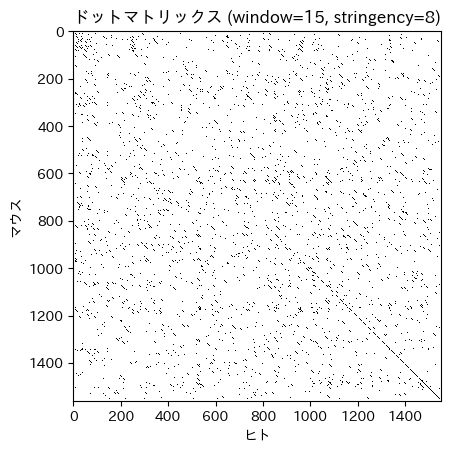

In [ ]:
# ドットマトリックスを表示
dot_matrix(aldh2_cds_human, aldh2_cds_mouse, 15, 8, "ヒト", "マウス")

In [ ]:
"""ldlr_human = read_fasta("ldlr-human.fasta")
# LDLR（Low-Density Lipoprotein Receptor、低密度リポタンパク質受容体）は、低密度リポタンパク質（LDL）に結合し、細胞に取り込む。
# この取り込みにより、細胞内のコレステロールレベルが調整され、過剰なコレステロールが細胞内に蓄積されるのを防ぐ。

In [ ]:
"""
# ドットマトリックスを表示
dot_matrix(ldlr_human[:800], ldlr_human[:800], 1, 1, "ヒトLDLR1", "ヒトLDLR1")

In [ ]:
"""
# ドットマトリックスを表示
dot_matrix(ldlr_human[:800], ldlr_human[:800], 17, 11, "ヒトLDLR1", "ヒトLDLR1")

In [ ]:
"""from Bio import Entrez, SeqIO

# NCBIのEntrezにアクセスするために、ユーザーのメールアドレスを設定
Entrez.email = "shimizu@bi.a.u-tokyo.ac.jp"

# NCBIからDNA配列を取得する関数
def fetch_ncbi_gene_sequence(accession_id):
    # NCBIのnucleotideデータベースからアクセッションIDで配列を取得
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")    # FASTA形式から配列本体を取り出す
    handle.close()
    return record.seq

# ヒトとラマのヘモグロビンβ鎖の遺伝子配列を取得
hbb_gene_human = fetch_ncbi_gene_sequence("NM_000518.5")  # Human HBB gene (accession ID: NM_000518.5)
hbb_gene_lama = fetch_ncbi_gene_sequence("NM_001172754.1")  # Lama HBB gene (accession ID: NM_001172754.1)

# 取得した遺伝子配列を表示
print(f"Human HBB Gene Sequence:\n{hbb_gene_human}\n")
print(f"Lama HBB Gene Sequence:\n{hbb_gene_lama}\n")


In [ ]:
"""from Bio import Entrez, SeqIO

# NCBIのEntrezにアクセスするために、ユーザーのメールアドレスを設定
Entrez.email = "shimizu@bi.a.u-tokyo.ac.jp"

# NCBIからCDS配列を取得する関数
def fetch_ncbi_gene_cds(accession_id):
    # NCBIのnucleotideデータベースからアクセッションIDで配列を取得（GenBank形式で取得）
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "gb")  # GenBank形式で取得
    handle.close()

    # CDS（コーディング領域）のみを抽出
    for feature in record.features:
        if feature.type == "CDS":
            # CDS領域の塩基配列を返す
            return feature.extract(record.seq)

    raise ValueError("CDS feature not found in the provided accession ID.")

# ラマのヘモグロビンβ鎖（1チェイン分のCDS配列）を取得
lama_hbb_cds = fetch_ncbi_gene_cds("NM_001172754.1")  # Lama HBB gene (accession ID: NM_001172754.1)

# 取得したCDS配列を表示
print(f"Lama HBB Gene CDS Sequence (1チェイン分):\n{lama_hbb_cds}\n")
"""


# アミノ酸置換スコア

**PAMとBLOSUM**

In [ ]:
PAM250 = [
    [2, -2, 0, 0, -2, 0, 0, 1, -1, -1, -2, -1, -1, -3, 1, 1, 1, -6, -3, 0],  # A
    [-2, 6, 0, -1, -4, 1, -1, -3, 2, -2, -3, 3, 0, -4, 0, 0, -1, 2, -4, -2],  # R
    [0, 0, 2, 2, -4, 1, 1, 0, 2, -2, -3, 1, -2, -3, 0, 1, 0, -4, -2, -2],     # N
    [0, -1, 2, 4, -5, 2, 3, 1, 1, -2, -4, 0, -3, -6, -1, 0, 0, -7, -4, -2],   # D
    [-2, -4, -4, -5, 12, -5, -5, -3, -3, -2, -6, -5, -5, -4, -3, 0, -2, -8, 0, -2],  # C
    [0, 1, 1, 2, -5, 4, 2, -1, 3, -2, -2, 1, 0, -5, 0, -1, -1, -5, -4, -2],   # Q
    [0, -1, 1, 3, -5, 2, 4, 0, 1, -2, -3, 0, -2, -5, -1, 0, 0, -7, -4, -2],   # E
    [1, -3, 0, 1, -3, -1, 0, 5, -2, -3, -4, -2, -3, -5, 0, 1, 0, -7, -5, -1], # G
    [-1, 2, 2, 1, -3, 3, 1, -2, 6, -2, -2, 0, -2, -2, 0, -1, -1, -3, 0, -2],  # H
    [-1, -2, -2, -2, -2, -2, -2, -3, -2, 5, 2, -2, 2, 1, -3, -2, 0, -5, -1, 4],  # I
    [-2, -3, -3, -4, -6, -2, -3, -4, -2, 2, 6, -3, 4, 2, -4, -3, -2, -2, -1, 2],  # L
    [-1, 3, 1, 0, -5, 1, 0, -2, 0, -2, -3, 5, 0, -5, -1, 0, 0, -3, -4, -2],   # K
    [-1, 0, -2, -3, -5, 0, -2, -3, -2, 2, 4, 0, 6, 0, -3, -2, -1, -4, -2, 2], # M
    [-3, -4, -3, -6, -4, -5, -5, -5, -2, 1, 2, -5, 0, 9, -5, -3, -3, 0, 7, -1], # F
    [1, 0, 0, -1, -3, 0, -1, 0, 0, -3, -4, -1, -3, -5, 6, 1, 0, -6, -5, -1],  # P
    [1, 0, 1, 0, 0, -1, 0, 1, -1, -2, -3, 0, -2, -3, 1, 2, 1, -2, -3, -1],    # S
    [1, -1, 0, 0, -2, -1, 0, 0, -1, 0, -2, 0, -1, -3, 0, 1, 3, -5, -3, 0],    # T
    [-6, 2, -4, -7, -8, -5, -7, -7, -3, -5, -2, -3, -4, 0, -6, -2, -5, 17, 0, -6], # W
    [-3, -4, -2, -4, 0, -4, -4, -5, 0, -1, -1, -4, -2, 7, -5, -3, -3, 0, 10, -2],  # Y
    [0, -2, -2, -2, -2, -2, -2, -1, -2, 4, 2, -2, 2, -1, -1, -1, 0, -6, -2, 4],  # V
]


In [ ]:
BLOSUM62 = [
    [4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],  # A
    [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],  # R
    [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3, 0, -2, -3, -2, 1, 0, -4, -2, -3],     # N
    [-2, -2, 1, 6, -3, 0, 2, -1, -1, -3, -4, -1, -3, -3, -1, 0, -1, -4, -3, -3], # D
    [0, -3, -3, -3, 9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1], # C
    [-1, 1, 0, 0, -3, 5, 2, -2, 0, -3, -2, 1, 0, -3, -1, 0, -1, -2, -1, -2],    # Q
    [-1, 0, 0, 2, -4, 2, 5, -2, 0, -3, -3, 1, -2, -3, -1, 0, -1, -3, -2, -2],   # E
    [0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2, -2, -3, -2, 0, -2, -2, -3, -3], # G
    [-2, 0, 1, -1, -3, 0, 0, -2, 8, -3, -3, -1, -2, -1, -2, -1, -2, -2, 2, -3],  # H
    [-1, -3, -3, -3, -1, -3, -3, -4, -3, 4, 2, -3, 1, 0, -3, -2, 0, -3, -1, 3],  # I
    [-1, -2, -3, -4, -1, -2, -3, -4, -3, 2, 4, -3, 2, 0, -3, -2, -1, -2, -1, 1], # L
    [-1, 2, 0, -1, -3, 1, 1, -2, -1, -3, -3, 5, -1, -3, -1, 0, -1, -3, -2, -3],  # K
    [-1, -1, -2, -3, -1, 0, -2, -2, -2, 1, 2, -1, 6, 0, -2, -1, -1, -4, -2, 2],  # M
    [-2, -3, -3, -3, -2, -3, -3, -3, -1, 0, 0, -3, 0, 6, -4, -2, -2, 1, 3, -1],  # F
    [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4, 7, -1, -1, -4, -3, -2], # P
    [1, -1, 1, 0, -1, 0, 0, 0, -1, -2, -2, 0, -1, -2, -1, 4, 1, -3, -2, -2],    # S
    [0, -1, 0, -1, -1, -1, -1, -2, -2, 0, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0],  # T
    [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -4, 1, -4, -3, -2, 11, 2, -3], # W
    [-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -2, 3, -3, -2, -2, 2, 7, -1], # Y
    [0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -3, 2, -1, -2, -2, 0, -3, -1, 4],  # V
]


In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# アミノ酸のインデックス対応表
amino_acids = "ARNDCQEGHILKMFPSTWYV"

# 2次元配列から辞書形式に変換する関数
def convert_matrix_to_dict(matrix):
    score_dict = {}
    for i in range(len(amino_acids)):
        for j in range(len(amino_acids)):
            score_dict[(amino_acids[i], amino_acids[j])] = matrix[i][j]
    return score_dict

def calculate_identity(aligned_seq1, aligned_seq2):
    """
    配列の一致度（identity）を計算する関数。
    一致する文字の数を、全体の長さに対する割合で返す。
    """
    matches = sum(res1 == res2 for res1, res2 in zip(aligned_seq1, aligned_seq2) if res1 != '-' and res2 != '-')
    total_length = min(len(aligned_seq1.replace('-', '')), len(aligned_seq2.replace('-', '')))
    return (matches / total_length) * 100

def perform_alignment(seq1, seq2, matrix):
    # 置換行列を辞書形式に変換
    score_dict = convert_matrix_to_dict(matrix)

    # グローバルアライメントを実行
    alignments = pairwise2.align.globalds(seq1, seq2, score_dict, -10, -1, one_alignment_only=True)   # スコア最大のものを1つだけ返す

    # 最良のアライメント結果をフォーマットして表示
    for alignment in alignments:
        aligned_seq1, aligned_seq2, score, begin, end = alignment
        print(format_alignment(*alignment))

        # 一致度を計算して表示
        identity = calculate_identity(aligned_seq1, aligned_seq2)
        print(f"配列の一致度: {identity:.2f}%")

In [ ]:
# アミノ酸配列の例
seq1 = "HEAGAWGHEE"
seq2 = "PAWHEAE"

# PAM250を使用したアライメント
print("PAM250によるアライメント:")
perform_alignment(seq1, seq2, PAM250)

# BLOSUM62を使用したアライメント
print("\nBLOSUM62によるアライメント:")
perform_alignment(seq1, seq2, BLOSUM62)

In [ ]:
# PAM250を使用したアライメント
print("PAM250によるアライメント:")
perform_alignment(hbb_human2, hbb_lama2, PAM250)

# BLOSUM62を使用したアライメント
print("\nBLOSUM62によるアライメント:")
perform_alignment(hbb_human2, hbb_lama2, BLOSUM62)

In [ ]:
hbb_human = fetch_uniprot_sequence("HBB_HUMAN")    # Human hemoglobin beta chain
lgb_lupin = fetch_uniprot_sequence("LGB2_LUPLU")  # Lupin leghemoglobin

# HBB_LAMGU: https://www.uniprot.org/uniprotkb/P02240/
# レグヘモグロビン（leghemoglobin）は、マメ科植物と根粒菌との共生に関わるタンパク質で、根粒菌が植物の根に形成する根粒の中に存在
# 酸素を結合・運搬する役割を持つタンパク質であり、動物のヘモグロビンと似た機能を果たす
# 根粒菌は窒素固定を行い、大気中の窒素をアンモニアに変換して植物に供給するが、
# このプロセスは酸素に敏感で、レグヘモグロビンは根粒菌にとって必要な酸素を適切に供給しながら、
# 窒素固定を妨げないよう酸素濃度を調節する役割を果たす
# レグヘモグロビンの酸素運搬機能は、ヘムという鉄を含む分子が関与しており、これが酸素と結合することで可能となる

# シーケンスの表示
print(f"Human Beta-Globin Sequence:\n{hbb_human}")
print(f"Lupin Leghemoglobin Sequence:\n{lgb_lupin}")

In [ ]:
# BLOSUM62を使用したアライメント
print("\nBLOSUM62によるアライメント:")
perform_alignment(hbb_human2, hbb_tuna, BLOSUM62)

# BLOSUM62を使用したアライメント
print("\nBLOSUM62によるアライメント:")
perform_alignment(hbb_human2, lgb_lupin, BLOSUM62)

# 塩基配列からアミノ酸配列への変換

**コドン表**

In [ ]:
CodonTable = {         # コドン表
        'TTT' : 'F', 'TCT' : 'S', 'TAT' : 'Y', 'TGT' : 'C',
        'TTC' : 'F', 'TCC' : 'S', 'TAC' : 'Y', 'TGC' : 'C',
        'TTA' : 'L', 'TCA' : 'S', 'TAA' : '*', 'TGA' : '*',
        'TTG' : 'L', 'TCG' : 'S', 'TAG' : '*', 'TGG' : 'W',

        'CTT' : 'L', 'CCT' : 'P', 'CAT' : 'H', 'CGT' : 'R',
        'CTC' : 'L', 'CCC' : 'P', 'CAC' : 'H', 'CGC' : 'R',
        'CTA' : 'L', 'CCA' : 'P', 'CAA' : 'Q', 'CGA' : 'R',
        'CTG' : 'L', 'CCG' : 'P', 'CAG' : 'Q', 'CGG' : 'R',

        'ATT' : 'I', 'ACT' : 'T', 'AAT' : 'N', 'AGT' : 'S',
        'ATC' : 'I', 'ACC' : 'T', 'AAC' : 'N', 'AGC' : 'S',
        'ATA' : 'I', 'ACA' : 'T', 'AAA' : 'K', 'AGA' : 'R',
        'ATG' : 'M', 'ACG' : 'T', 'AAG' : 'K', 'AGG' : 'R',

        'GTT' : 'V', 'GCT' : 'A', 'GAT' : 'D', 'GGT' : 'G',
        'GTC' : 'V', 'GCC' : 'A', 'GAC' : 'D', 'GGC' : 'G',
        'GTA' : 'V', 'GCA' : 'A', 'GAA' : 'E', 'GGA' : 'G',
        'GTG' : 'V', 'GCG' : 'A', 'GAG' : 'E', 'GGG' : 'G'
}

**DNAの配列からアミノ酸配列への変換**

In [ ]:
dna = input("dna = ")   # "ATGGCTGAGGGGGACGCAGGGAGCGACCAGAGGCAGAAT"
pro = ''
for i in range(0, len(dna) // 3):
	codon = dna[3*i : 3*i+3]   # dna[0:2], dna[3:5], dna[6:8], ...
	if (codon in CodonTable):
		pro += CodonTable[codon]
	else:
		pro += 'X'          # CodonTableにないパターンが現れたらXに変換

print(pro)

**可能性のある読み枠での変換**

In [ ]:
dna = input("dna = ")   # "ATGGCTGAGGGGGACGCAGGGAGCGACCAGAGGCAGAAT"

def translate(seq, seqlen):
  pro = ''
  s = seq.upper()       # 小文字の塩基はすべて大文字にして変換
  for i in range(0, seqlen // 3):
	  codon = s[3*i : 3*i+3]   # seq[0:2], seq[3:5], seq[6:8], ...
	  if (codon in CodonTable):
		  pro += CodonTable[codon]
	  else:
		  pro += 'X'          # CodonTableにないパターンが現れたらXに変換
  return(pro)

print(translate(dna, len(dna)))
print(translate(dna[1:], len(dna)-1))
print(translate(dna[2:], len(dna)-2))


**さらに逆鎖の可能性を入れて変換**

In [ ]:
dna = input("dna = ")   # "ATGGCTGAGGGGGACGCAGGGAGCGACCAGAGGCAGAAT"

def translate(seq, seqlen):
  pro = ''
  for i in range(0, seqlen // 3):
	  codon = seq[3*i : 3*i+3]   # seq[0:2], seq[3:5], seq[6:8], ...
	  if (codon in CodonTable):
		  pro += CodonTable[codon]
	  else:
		  pro += 'X'          # CodonTableにないパターンが現れたらXに変換
  return(pro)

print(translate(dna, len(dna)))
print(translate(dna[1:], len(dna)-1))
print(translate(dna[2:], len(dna)-2))
dnar = Seq.reverse_complement(dna)
print(translate(dnar, len(dnar)))
print(translate(dnar[1:], len(dnar)-1))
print(translate(dnar[2:], len(dnar)-2))


**ALDH2のコード領域を変換**

In [ ]:
def read_fasta(name):
    f = open(name, 'r')
    seq=''
    for line in f.readlines():
        if line[0] != '>':
            seq += line.strip()
    f.close()
    return seq

def translate(seq, seqlen):
  pro = ''
  s = seq.upper()
  for i in range(0, seqlen // 3):
	  codon = s[3*i : 3*i+3]   # seq[0:2], seq[3:5], seq[6:8], ...
	  if (codon in CodonTable):
		  pro += CodonTable[codon]
	  else:
		  pro += 'X'          # CodonTableにないパターンが現れたらXに変換
  return(pro)

sh = read_fasta('human-aldh2-cds.fna')
sc = read_fasta('chiken-aldh2-cds.fna')
seq_human2 =translate(sh, len(sh))
seq_chiken2 =translate(sc, len(sc))

print(seq_human2)
print(seq_chiken2)

In [ ]:
# データベースに登録されているアミノ酸配列とコード領域のDNA配列をアミノ酸配列に変換した結果の比較
# print(hbb_human1 == seq_human2[:-1])    # 変換した結果の最後の1文字は停止コドンの*なので削除
# print(hbb_lama1 == seq_lama2[:-1])